In [299]:
%load_ext autoreload
%autoreload 2

import NLTE.NLTE_model
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling.physical_models import BlackBody
import astropy.units as u
import astropy.constants as const


environments = [NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= 0.245, t_d=1.43),
                NLTE.NLTE_model.Environment(T_phot= 2750, photosphere_velocity= 0.190, line_velocity= 0.190, t_d=3.41)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[<NLTE.NLTE_model.CollisionProcess object at 0x7f3952cee320>, <NLTE.NLTE_model.RadiativeProcess object at 0x7f393df6bfd0>, <NLTE.NLTE_model.RecombinationProcess object at 0x7f393c1efee0>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7f393d78f4c0>]
[<NLTE.NLTE_model.CollisionProcess object at 0x7f393c1e11b0>, <NLTE.NLTE_model.RadiativeProcess object at 0x7f393d711420>, <NLTE.NLTE_model.RecombinationProcess object at 0x7f393d7101f0>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7f393d7129b0>]


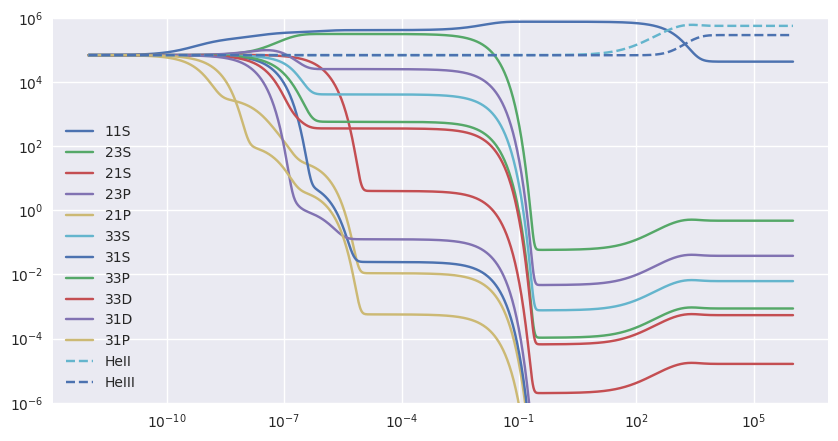

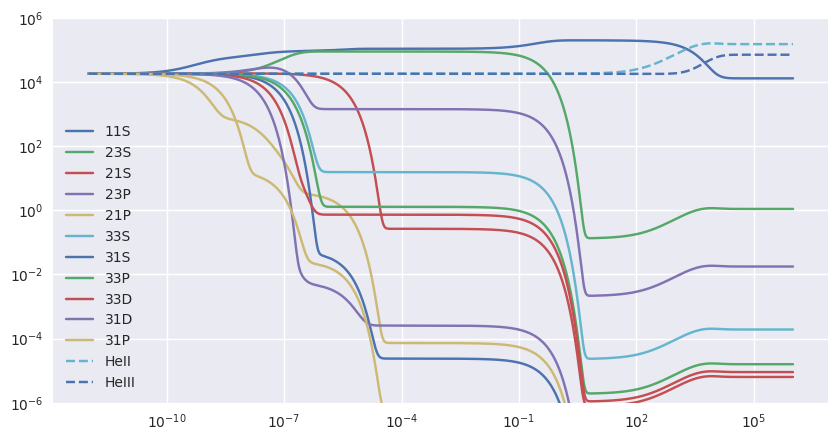

In [300]:
states = NLTE.NLTE_model.States()
for environment in environments:
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
    nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    print(nlte_solver.processes)
    t, y = nlte_solver.solve(np.geomspace(1e-12,1000000, 1000))
    plt.figure(figsize=(10,5))
    plt.plot(t, y.T[:, :-2], label = states.names);
    plt.plot(t, y.T[:, -2:], linestyle="--", label  = ["HeII", "HeIII"]);
    plt.yscale("log")
    plt.xscale("log")
    plt.ylim(1e-6, 1e6)
    plt.legend()
    #for name, amount in zip(states.names + ["HeII", "HeIII"], y.T[-1]):
    #    print(name, amount)

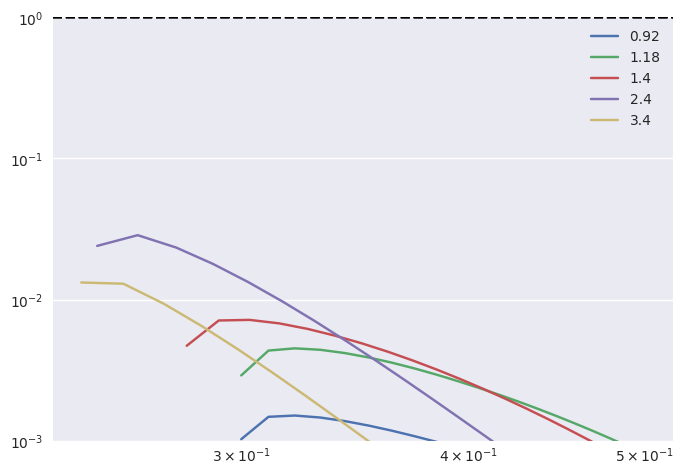

In [302]:

parameters = [{"T_phot": 5400, "photosphere_velocity": 0.3, "t_d": 0.92},
              {"T_phot": 4400, "photosphere_velocity": 0.3, "t_d": 1.18},
              {"T_phot": 4200, "photosphere_velocity": 0.28, "t_d": 1.4},
              {"T_phot": 3300, "photosphere_velocity": 0.25, "t_d": 2.4},
              {"T_phot": 3000, "photosphere_velocity": 0.245, "t_d": 3.4},
              ]# TODO: rest
density_table = []
for params in parameters:
    velocities = np.linspace(params["photosphere_velocity"], 0.5, 20)
    densities = []
    for v in velocities:
        environment  = NLTE.NLTE_model.Environment(**params, line_velocity= v)
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
        densities.append(nlte_solver.solve(1e7)[1][:, -1])
    density_table.append(np.array(densities))
    densities = np.array(densities)
    plt.plot(velocities, densities[:,1]/(7.4*params["t_d"]**-1), label = params["t_d"]);
    plt.yscale("log")
    plt.axhline(1, linestyle="--", color="black")
    plt.xscale("log")
    plt.ylim(1e-3, 1e0)
    plt.legend()
    #for name, amount in zip(states.names + ["HeII", "HeIII"], y.T[-1]):
    #    print(name, amount)

In [303]:
import pickle
density_table = np.array(density_table)
pickle.dump({"densities":density_table, "parameters" : parameters, "states" : nlte_solver.states}, open("densities.pkl", "wb"))


In [304]:
import astropy.units as u
(4 * u.u).cgs

<Quantity 6.64215627e-24 g>

In [305]:

# demonstrate how to open the pickle file
import pickle
data = pickle.load(open("densities.pkl", "rb"))
data["densities"] # shape: (times, velocities, species)
data["parameters"] # dictionary of parameters  
data["states"] # list of species names
velocities = np.linspace(data["parameters"][0]["photosphere_velocity"], 0.5, 20)

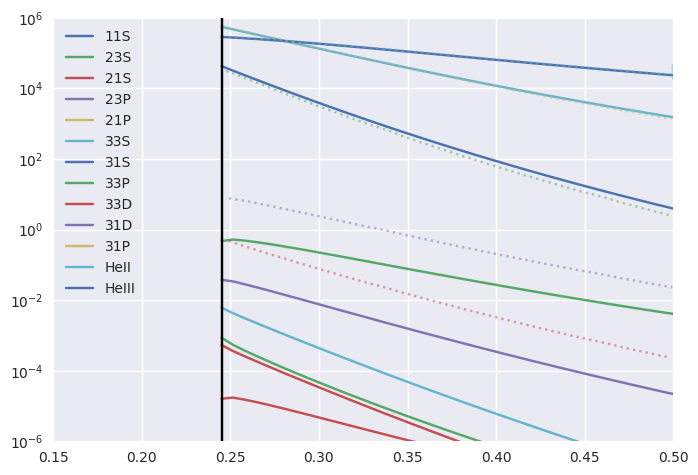

In [306]:
states = NLTE.NLTE_model.States()
velocities = np.linspace(0.245, 0.5, 40)
densities = []
for v in velocities:
    environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= v, t_d=1.43)
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
    nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    densities.append(nlte_solver.solve(1e7)[1][:, -1])

    
for name, amount in zip(states.all_names, np.array(densities).T):
    plt.plot(velocities, amount, label=name)
plt.yscale("log")
plt.legend()
plt.ylim(1e-6, 1e6)


tarumi_states = ["11S", "23P", "23S", "He+", "He2+"]
for name in tarumi_states:
    velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/Early{name}.csv", unpack=True, delimiter=";")
    plt.plot(velocity_23S, pops_23S, label=name, alpha=0.5, linestyle=":")
plt.xlim(0.15, 0.5)
plt.axvline(0.245, linestyle="-", color="black")

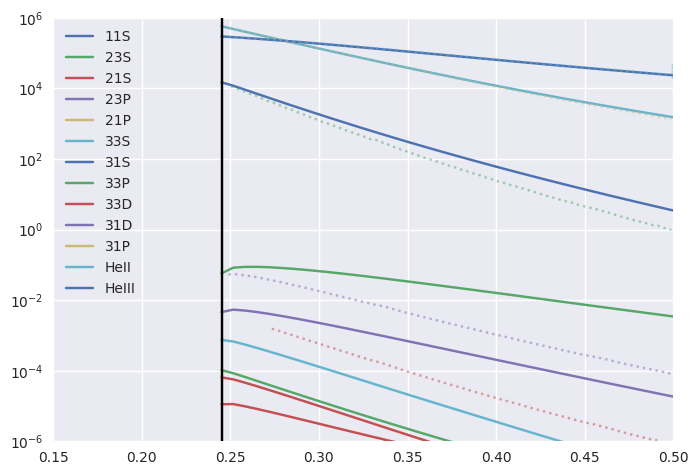

In [307]:
states = NLTE.NLTE_model.States()
velocities = np.linspace(0.245, 0.5, 40)
densities = []
for v in velocities:
    environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= v, t_d=1.43)
    #environment.spectrum = BlackBody(environment.spectrum.temperature, scale=0.*environment.spectrum.scale)
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
    #nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    densities.append(nlte_solver.solve(1e7)[1][:, -1])

    
for name, amount in zip(states.all_names, np.array(densities).T):
    plt.plot(velocities, amount, label=name)
plt.yscale("log")
plt.legend()
plt.ylim(1e-6, 1e6)


tarumi_states = ["11Swithout", "23Pwithout", "23Swithout", "He+", "He2+"]
for name in tarumi_states:
    velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/Early{name}.csv", unpack=True, delimiter=";")
    plt.plot(velocity_23S, pops_23S, label=name, alpha=0.5, linestyle=":")
plt.xlim(0.15, 0.5)
plt.axvline(0.245, linestyle="-", color="black")

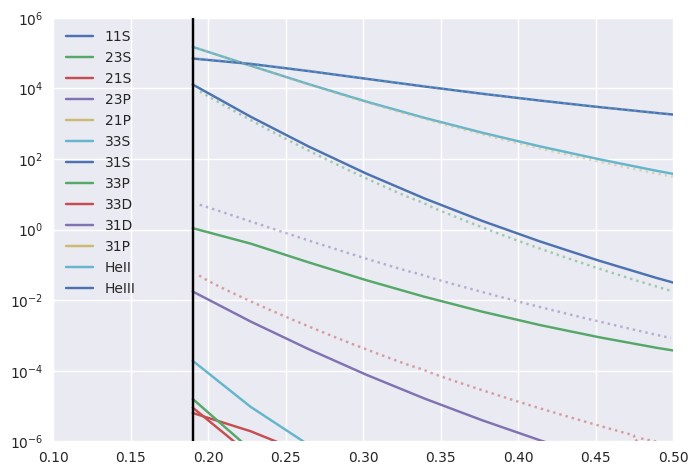

In [308]:
states = NLTE.NLTE_model.States()
velocities = np.linspace(0.19, 0.9, 20)
densities = []
for v in velocities:
    #states = NLTE.NLTE_model.States().filter(["11S", "23S", "21S", "23P", "21P", "33S"])
    environment  = NLTE.NLTE_model.Environment(T_phot= 2750, photosphere_velocity= 0.19, line_velocity= v, t_d= 3.41)
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment)#, states=states)
    nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    densities.append(nlte_solver.solve(1e7)[1][:, -1])

for name, amount in zip(states.all_names, np.array(densities).T):
    plt.plot(velocities, amount, label=name)
plt.yscale("log")
plt.legend()
plt.ylim(1e-6, 1e6)

tarumi_states = ["11S", "23P", "23S", "He+", "He2+"]
for name in tarumi_states:
    velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/late{name}.csv", unpack=True, delimiter=";")
    plt.plot(velocity_23S, pops_23S, label=name, alpha=0.5, linestyle=":")
plt.xlim(0.1, 0.5)
plt.axvline(0.19, linestyle="-", color="black")

[<NLTE.NLTE_model.CollisionProcess object at 0x7f3952914b50>, <NLTE.NLTE_model.RadiativeProcess object at 0x7f393f2b53f0>, <NLTE.NLTE_model.PhotoionizationProcess object at 0x7f394311d390>, <NLTE.NLTE_model.RecombinationProcess object at 0x7f394311db70>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7f393eb74a00>]


(0.001, 1000.0)

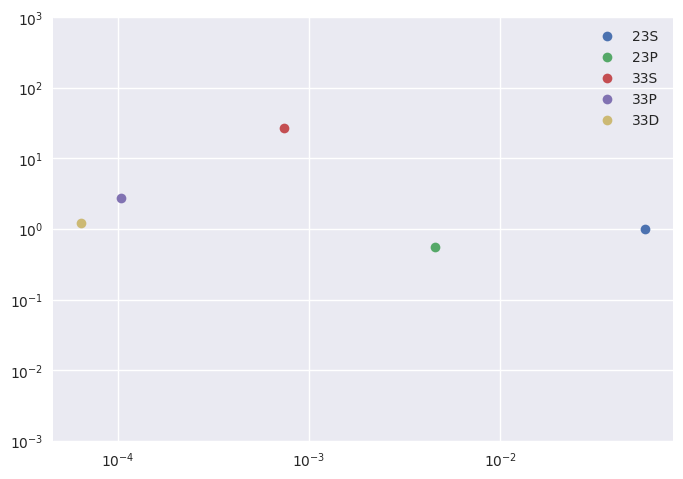

In [312]:
environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= 0.245, t_d=1.43)
#environment.spectrum = BlackBody(environment.spectrum.temperature, scale=0.*environment.spectrum.scale)
nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
print(nlte_solver.processes)
nlte_solver.processes = nlte_solver.processes[:3] + nlte_solver.processes[3:]
density = nlte_solver.solve(1e7)[1][:, -1]

p_i = states.multiplicities * np.exp(-(states.energies - states.energies[1]) / (const.k_B * 4400*u.K))
p_i = p_i * density[1] / p_i[1]
for name, amount, expected in zip(states.all_names[1:], density[1:-2], p_i[1:]):
    if name[1] == "3":
        plt.loglog(amount, amount/expected, "o", label=name)
plt.legend()
plt.ylim(1e-3, 1e3)

removed:  []
[<NLTE.NLTE_model.CollisionProcess object at 0x7f3951f03940>, <NLTE.NLTE_model.RadiativeProcess object at 0x7f393a73d2a0>, <NLTE.NLTE_model.PhotoionizationProcess object at 0x7f3952c712d0>, <NLTE.NLTE_model.RecombinationProcess object at 0x7f3952d8ef50>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7f3952e136a0>]
Density in ortho:  1.0
Density in para:  1.0
Density ionized:  1.0


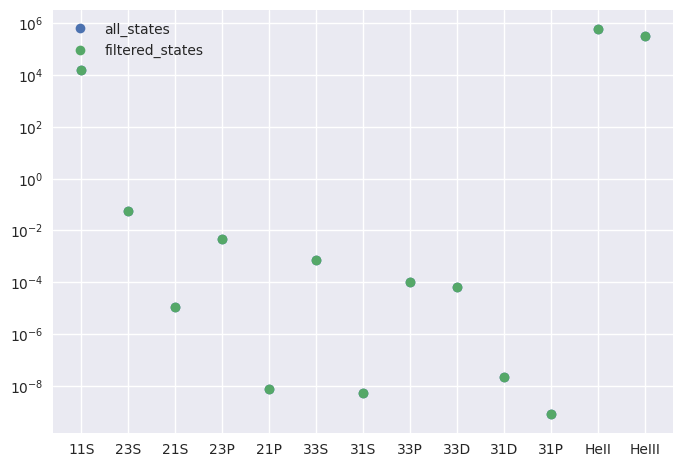

In [311]:
all_states = NLTE.NLTE_model.States()
states_filtered = all_states.filter(["11S", "21S", "21P", "31D", "31P", "31S", "23S", "23P"])
print("removed: ", np.setdiff1d(all_states.all_names, states.all_names))
environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= 0.245, t_d=1.43)
nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
print(nlte_solver.processes)
#nlte_solver.processes = nlte_solver.processes[:3] + nlte_solver.processes[3:]
densities_total = nlte_solver.solve(1e7)[1][:,-1]

environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= 0.245, t_d=1.43)
nlte_solver = NLTE.NLTE_model.NLTESolver(environment, states=states)
nlte_solver.processes = nlte_solver.processes[:3] + nlte_solver.processes[3:]

densities = nlte_solver.solve(1e7)[1][:,-1]
ortho_filter = np.array([name[1] == "3" for name in states.all_names])
para_filter = np.array([name[1] == "1" for name in states.all_names])
ionized_filter = np.array([name[1] == "e" for name in states.all_names])
ortho_filter_total = np.array([name[1] == "3" for name in all_states.all_names])
para_filter_total = np.array([name[1] == "1" for name in all_states.all_names])
ionized_filter_total = np.array([name[1] == "e" for name in all_states.all_names])
print("Density in ortho: " , sum(densities_total[ortho_filter_total])/sum(densities[ortho_filter]))
print("Density in para: " , sum(densities_total[para_filter_total])/sum(densities[para_filter]))
print("Density ionized: " , sum(densities_total[ionized_filter_total])/sum(densities[ionized_filter]))
plt.plot(all_states.all_names, densities_total, "o", label="all_states")
plt.plot(states.all_names, densities, "o", label="filtered_states")
plt.legend()
plt.yscale("log")

In [ ]:
states, all_states

(States(names=['11S', '23S', '21S', '23P', '21P', '31S', '31D', '31P'], multiplicities=array([1, 3, 1, 9, 3, 1, 5, 3]), energies=<Quantity [ 0.        , 19.81961452, 20.61577482, 20.96408689, 21.21802271,
            22.92031736, 23.0740748 , 23.08701853] eV>, ionization_species=['HeII', 'HeIII']),
 States(names=['11S', '23S', '21S', '23P', '21P', '33S', '31S', '33P', '33D', '31D', '31P'], multiplicities=array([ 1,  3,  1,  9,  3,  3,  1,  9, 15,  5,  3]), energies=<Quantity [ 0.        , 19.81961452, 20.61577482, 20.96408689, 21.21802271,
            22.71846642, 22.92031736, 23.00707315, 23.07365071, 23.0740748 ,
            23.08701853] eV>, ionization_species=['HeII', 'HeIII']))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[<NLTE.NLTE_model.CollisionProcess object at 0x7f393f2282b0>, <NLTE.NLTE_model.RadiativeProcess object at 0x7f393f22abf0>, <NLTE.NLTE_model.PhotoionizationProcess object at 0x7f393f67c790>, <NLTE.NLTE_model.RecombinationProcess object at 0x7f393f9330a0>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7f393f9bc550>]


/tmp/ipykernel_826/4181820574.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(1e-6, 0)


Text(0, 0.5, 'fluxes (events/cm^3/s)')

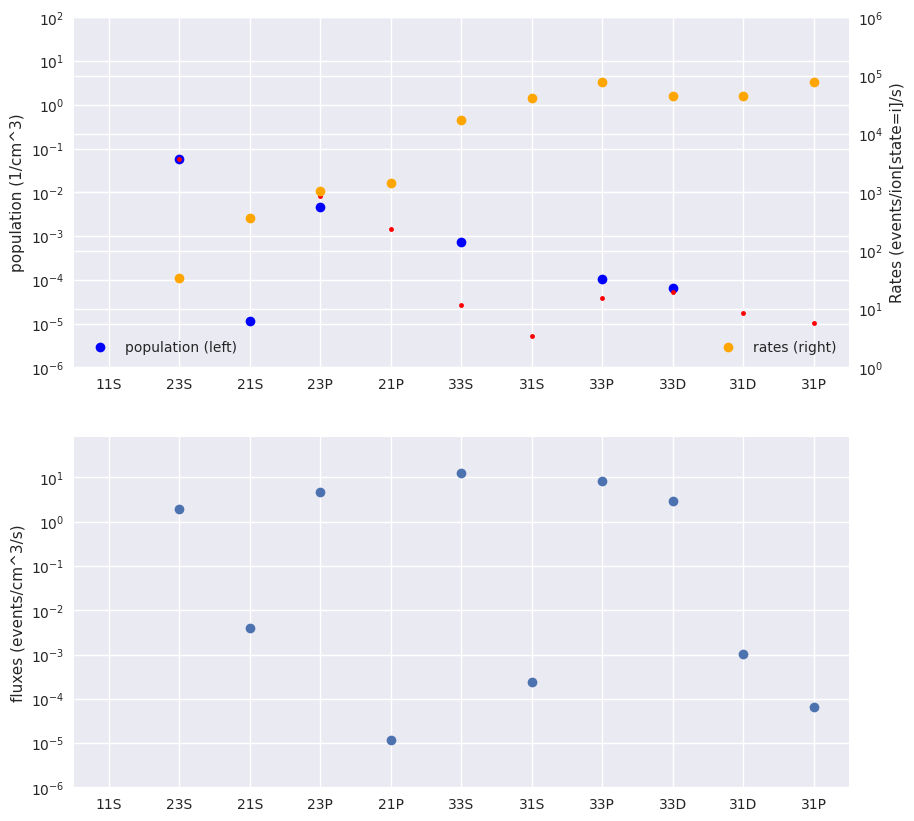

In [314]:
nlte_solver = NLTE.NLTE_model.NLTESolver( environments[0])
nlte_solver.processes = nlte_solver.processes
t, y = nlte_solver.solve(1e6)
max_flux = np.max(nlte_solver.get_transition_rate_matrix() * y.T[-1][None,:])
print(nlte_solver.processes)
process_fluxes = (nlte_solver.processes[2].get_transition_rate_matrix()[-2] * y.T[-1])
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))

ax1_left  = ax1
ax1_left.semilogy(nlte_solver.states.names, y[:-2, -1], "o", label="population (left)", color="blue")
ax1_left.legend(loc="lower left")
ax1_left.set_ylim(1e-6, 1e2)
ax1_left.set_ylabel("population (1/cm^3)")
p_i = nlte_solver.states.multiplicities * np.exp(-nlte_solver.states.energies / (const.k_B * 4400*u.K))
p_i = p_i * density[1] / p_i[1]
ax1_left.plot(nlte_solver.states.names,  p_i, ".", label="LTE population (left)", color="red")
ax1_right = ax1.twinx()
ax1_right.semilogy(nlte_solver.states.names, nlte_solver.processes[2].get_transition_rate_matrix()[-2, :-2], "o", label="rates (right)", color="orange")
ax1_right.legend(loc="lower right")
ax1_right.set_ylim(1e0, 1e6)
ax1_right.set_ylabel("Rates (events/ion[state=i]/s)")

ax2.semilogy(nlte_solver.states.names, (nlte_solver.processes[2].get_transition_rate_matrix()[-2,:-2] * y[:-2, -1]), "o")
ax2.legend()
ax2.set_ylim(1e-6, 0)
ax2.set_ylabel("fluxes (events/cm^3/s)")

/tmp/ipykernel_826/3060107585.py:34: RuntimeWarning: divide by zero encountered in log10
  widths = np.clip(np.log10(process_fluxes/max_flux)+dynamic_range, 0, 10)/dynamic_range*6


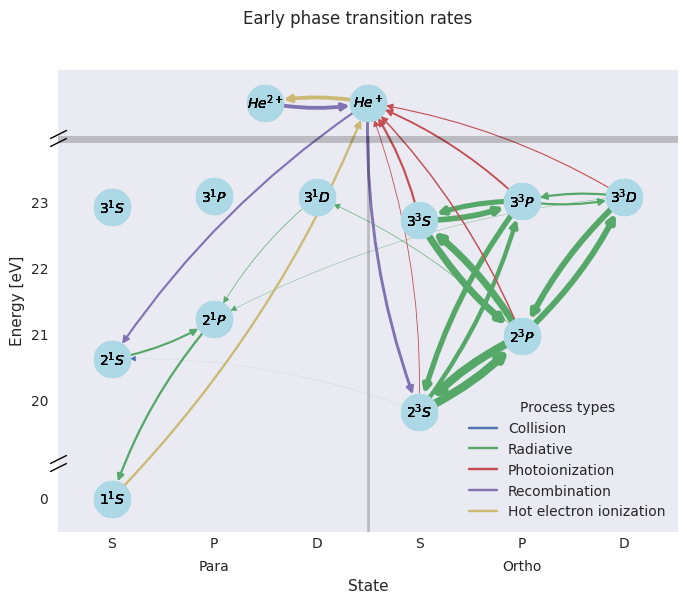

In [316]:
import networkx as nx
import NLTE.NLTE_model
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator


import networkx as nx
import NLTE.NLTE_model
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('seaborn-v0_8')


# A_{i,j} = rate to state i from state j 
#environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity=  0.245, t_d=1.43)
for environment in environments[:1]:
        #plt.figure(figsize=(8,6))
        # make subplots with the second one being taller
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8,6), gridspec_kw={'height_ratios': [0.5, 2.5, 0.5]})
        plt.subplots_adjust(wspace=0, hspace=0)
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
        nlte_solver.processes = nlte_solver.processes
        t, y = nlte_solver.solve(1e6)
        max_flux = np.max(nlte_solver.get_transition_rate_matrix() * y.T[-1][None,:])
        for i, process in enumerate(nlte_solver.processes):
                process_fluxes = (process.get_transition_rate_matrix() * y.T[-1][None,:]).T

                # give nodes the names states.names + ["HeII", "HeIII"]
                order= [0,2,4,6,9, 10,1, 3, 5, 7, 8, 11, 12]
                #order = np.arange(len(states.names) + 2)
                dynamic_range = 5
                widths = np.clip(np.log10(process_fluxes/max_flux)+dynamic_range, 0, 10)/dynamic_range*6
                #widths = np.clip(process_fluxes/max_flux * 5, 0, 10)
                G = nx.DiGraph(widths[order, :][:, order])
                # rename nodes:
                labels = {i:name for i, name in enumerate(np.array(nlte_solver.states.all_names)[order])}
                G = nx.relabel_nodes(G, labels)
                weights = nx.get_edge_attributes(G,'weight').values()
                pos = {"11S": (0,-3), "21S": (0, 1), "31S": (0, 2),
                                      "21P": (1, 0), "31P": (1, 1), 
                                                     "31D": (2, 0), 
                                      "23S": (3, 1), "33S": (3, 2),
                                      "23P": (4, 0), "33P": (4, 1), 
                                                     "33D": (5, 0), 
                       }
                final_pos = {name: (pos[name][0], energy.value) for name, energy in zip(nlte_solver.states.all_names, nlte_solver.states.energies)} 
                final_pos["HeII"] = (2.5, 24.5)
                final_pos["HeIII"] = (1.5, 24.5)
                final_pos["11S"] = 0, 18.5
                labels = {name: f"${name[0]}^{name[1]}{name[2]}$" for name in nlte_solver.states.all_names}
                labels["HeII"] = "$He^+$"
                labels["HeIII"] = "$He^{2+}$"
                #pos = nx.circular_layout(G)
                for ax in [ax1, ax2, ax3]:
                        nx.draw(G, final_pos, ax=ax,
                                width=list(weights),
                                edge_color=f'C{i}' ,connectionstyle="arc3,rad=0.1",
                                with_labels=True, labels=labels, 
                                node_color='lightblue', node_size=700, font_size=10, font_weight="light",)
                plt.plot([],[], color=f'C{i}', label=f'{process.name}')
        ax3.set_ylim(18, 19)
        ax2.set_ylim(19, 24)
        ax2.axhline(24, linestyle="-", linewidth=10, alpha=0.2, color="black")
        ax2.axvline(2.5, linestyle="-", linewidth=2, alpha=0.2, color="black")
        ax3.axvline(2.5, linestyle="-", linewidth=2, alpha=0.2, color="black")
        ax1.set_ylim(24, 25)
        
        ax1.spines.bottom.set_visible(False)
        ax2.spines.top.set_visible(False)
        ax2.spines.bottom.set_visible(False)
        ax3.spines.top.set_visible(False)

        ax1.axis("on")
        ax2.axis("on")
        ax3.axis("on")
        ax2.tick_params(left=True, labelleft=True)
        ax3.tick_params(left=True, labelleft=True, labelbottom=True, bottom=True, which="both")
        
        d = .5  # proportion of vertical to horizontal extent of the slanted line
        kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
        ax2.plot([0], [0.02], transform=ax2.transAxes, **kwargs)
        ax3.plot([0], [0.98], transform=ax3.transAxes, **kwargs)
        ax1.plot([0], [0.02], transform=ax1.transAxes, **kwargs)
        ax2.plot([0], [0.98], transform=ax2.transAxes, **kwargs)
        ax2.set_ylabel("Energy [eV]")
        ax3.set_xlabel("State")
        ax3.set_yticks([final_pos["11S"][1]])
        ax3.set_yticklabels(["0"])
        ax2.set_yticks(ax2.get_yticks()[1:-1])
        plt.legend(loc="lower right", title="Process types")
        ax3.tick_params(axis='x', which='major', pad=20)
        ax3.set_xticks([1.001, 3.999])
        ax3.set_xticklabels(["Para", "Ortho"])
        ax3.minorticks_on()
        ax3.set_xticks([0, 1, 2, 3, 4, 5], minor=True)

        ax3.set_xticklabels(["S", "P", "D", "S", "P", "D"], minor=True)
        #plt.setp(ax.get_xticklabels(), rotation=0)

        ax1.grid()
        ax2.grid()
        ax3.grid()
        if environment.t_d < 3:
                plt.suptitle("Early phase transition rates")

        else:
                plt.suptitle("Late phase transition rates")
        plt.savefig(f"transition_rates_{environment.t_d}.pdf", bbox_inches="tight")
        plt.savefig(f"transition_rates_{environment.t_d}.png", bbox_inches="tight", dpi=300)

In [317]:
triplet_filer = np.array([x[1] == "3" for x in nlte_solver.states.all_names])

#(nlte_solver.get_transition_rate_matrix() * y.T[-1][None,:]), nlte_solver.states
y.T[-1][triplet_filer], np.array(nlte_solver.states.all_names)[triplet_filer]

(array([5.68209101e-02, 4.56651851e-03, 7.41989225e-04, 1.03621795e-04,
        6.45598891e-05]),
 array(['23S', '23P', '33S', '33P', '33D'], dtype='<U5'))

In [ ]:
ax.xaxis.get_ticklocs(minor=True)     # []


array([0, 1, 2, 3, 4, 5])

In [ ]:
labels = {name: f"${name[0]}*{name[1]}{name[2]}" for name in nlte_solver.states.all_names}


for process Collision the max flux into ortho states is 0.0033134052192236195, which is from state 21S to state 23S
for process Radiative the max flux into ortho states is 0.0005020903158711679, which is from state 31D to state 23P
for process Photoionization the max flux into ortho states is 0.0, which is from state 11S to state 23S
for process Recombination the max flux into ortho states is 34.52318075042101, which is from state HeII to state 23S
for process Hot electron ionization the max flux into ortho states is 0.0, which is from state 11S to state 23S


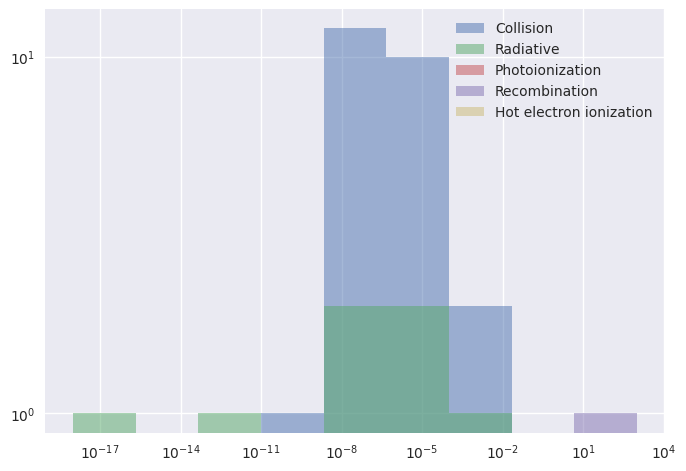

for process Collision the max flux out of ortho states is 0.722767508585616, which is from state 23S to state 21S
for process Radiative the max flux out of ortho states is 2.5895846891066947, which is from state 23P to state 31D
for process Photoionization the max flux out of ortho states is 11.20386792490977, which is from state 33S to state HeII
for process Recombination the max flux out of ortho states is 0.0, which is from state 23S to state 11S
for process Hot electron ionization the max flux out of ortho states is 6.282525732494564e-05, which is from state 23S to state HeII


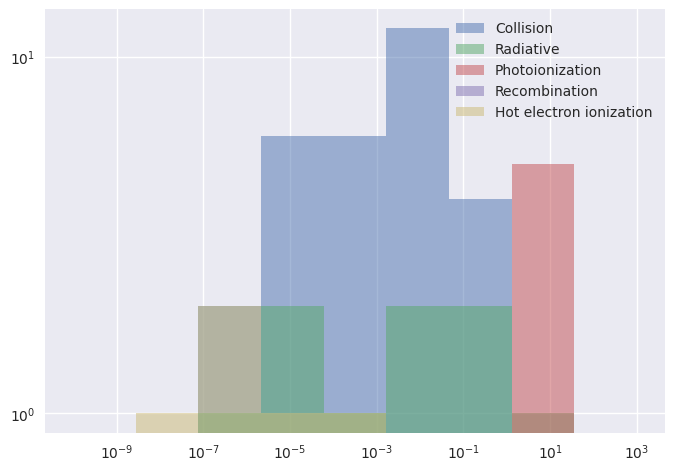

In [ ]:
# make histogram of the flux sizes for each process
environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= 0.245, t_d=1.43)
nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
#nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
t, y = nlte_solver.solve(1000000)

ortho_states = np.array([name[1] == "3" for name in nlte_solver.states.all_names])
for process in nlte_solver.processes:
    fluxes =  process.get_transition_rate_matrix()* y.T[-1][None,:] 
    in_fluxes = fluxes[ortho_states, :][:, ~ortho_states]
    idx = np.unravel_index(np.argmax(in_fluxes), in_fluxes.shape)
    plt.hist(in_fluxes.flatten(), bins=np.geomspace(1e-18, 1000, 10), label=process.name, alpha=0.5, histtype="stepfilled")
    print(f"for process {process.name} the max flux into ortho states is {np.max(in_fluxes)}, which is from state {np.array(nlte_solver.states.all_names)[~ortho_states][idx[1]]} to state {np.array(nlte_solver.states.all_names)[ortho_states][idx[0]]}")

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()
for process in nlte_solver.processes:
    fluxes =  process.get_transition_rate_matrix()* y.T[-1][None,:] 
    out_fluxes = fluxes[~ortho_states, :][:, ortho_states]
    idx = np.unravel_index(np.argmax(out_fluxes), out_fluxes.shape)
    plt.hist(out_fluxes.flatten(), bins=np.geomspace(1e-10, 1000, 10), label=process.name, alpha=0.5, histtype="stepfilled")
    print(f"for process {process.name} the max flux out of ortho states is {np.max(out_fluxes)}, which is from state {np.array(nlte_solver.states.all_names)[ortho_states][idx[1]]} to state {np.array(nlte_solver.states.all_names)[~ortho_states][idx[0]]}")
plt.legend()
plt.xscale("log")
plt.yscale("log")

In [ ]:
nlte_solver.processes[1].get_A_rates()[nlte_solver.states.all_names.index("11S"), nlte_solver.states.all_names.index("23P")]
nlte_solver.processes[1].get_A_rates()[nlte_solver.states.all_names.index("23P"), nlte_solver.states.all_names.index("33D")]
nlte_solver.processes[1].get_A_rates()[nlte_solver.states.all_names.index("21P"), nlte_solver.states.all_names.index("33P")]

0.0

nlte_solver.processes[1].get_A_rates()[nlte_solver.states.all_names.index("21S"), nlte_solver.states.all_names.index("23P")]

In [ ]:
nlte_solver.processes[1].get_A_rates()[nlte_solver.states.all_names.index("11S"), nlte_solver.states.all_names.index("23P")]


176.4

In [ ]:
import pandas
def get_A_rates(self):
    get_n = lambda n, l, count: (int(n)-1)*2 if count else (int(n)-1)
    nist_table = pandas.read_csv("atomic data/A_rates_NIST.csv")
    def get_state_name(config_series, term_series):
        n = config_series.str.findall("([\d+]+)([spdf])(2?)").apply(lambda x: str(1+sum([get_n(*nlm) for nlm in x])))
        term = term_series.str.strip("=\"*")
        return n+term

    lower_state = get_state_name(nist_table["conf_i"], nist_table["term_i"])
    upper_state = get_state_name(nist_table["conf_k"], nist_table["term_k"])

    A_coefficients = np.zeros((len(self.states.names), len(self.states.names)))

    for state_name in self.states.names:
        selection = (i_state == state_i) & (j_state.isin(names)) & (nist_table["Aki(s^-1)"] != '=""')
        selected_A = nist_table[selection]["Aki(s^-1)"].str.strip("=\"*")
        for state_j, A in zip(j_state[selection], selected_A):
            A_coefficients[self.states.names.index(state_i),self.states.names.index(state_j)] = float(A)
    
    A_coefficients[names.index("11S"), names.index("23P")] = 1.764e+02# 1.764e+02 	#3.27e-1
    """
    A_coefficients[names.index("11S"), names.index("23P")] = 0# 1.764e+02 	#3.27e-1
    A_coefficients[names.index("23P"), names.index("31D")] = 0# 1.764e+02 	#3.27e-1
    A_coefficients[names.index("21P"), names.index("33D")] = 0# 1.764e+02 	#3.27e-1
    A_coefficients[names.index("21P"), names.index("23S")] = 0# 1.764e+02 	#3.27e-1
    A_coefficients[names.index("31D"), names.index("33P")] = 0# 1.764e+02 	#3.27e-1
    """
    """
    # F. Drake 1969
    drake_coeff = {"11S": {"21S": 5.13e1}}#, "23S": 4.02e-9}}
    for state_i, subtable in drake_coeff.items():
        if state_i not in states:
            continue
        for state_j, coeff in subtable.items():
            if state_j not in states:
                continue
            A_coefficients[states.index(state_i),states.index(state_j)] = coeff
    """
    return A_coefficients

A_coefficients = get_A_rates(nlte_solver.processes[1])

NameError: name 'i_state' is not defined

In [298]:

get_n = lambda n, l, count: (int(n)-1)*2 if count else (int(n)-1)
nist_table = pandas.read_csv("atomic data/A_rates_NIST.csv")
def get_state_name(config_series, term_series):
    n = config_series.str.findall("([\d+]+)([spdf])(2?)").apply(lambda x: str(1+sum([get_n(*nlm) for nlm in x])))
    term = term_series.str.strip("=\"*")
    return n+term

lower_state = get_state_name(nist_table["conf_i"], nist_table["term_i"])
upper_state = get_state_name(nist_table["conf_k"], nist_table["term_k"])
A_coefficients = pandas.to_numeric(nist_table["Aki(s^-1)"].str.strip("=\"*"))
#names = self.states.names
names = NLTE.NLTE_model.States().names
A_matrix = np.zeros((len(names), len(names)))

df = pandas.DataFrame({"lower_state": lower_state, "upper_state": upper_state, "A_coefficients": A_coefficients, "multiplicity": nist_table["g_i"]})
for (lower, upper), A in df.groupby(["lower_state", "upper_state"]):
    weighted_A = np.average(A["A_coefficients"], weights=A["multiplicity"])
    if lower in names and upper in names:
        A_matrix[names.index(lower),names.index(upper)] = weighted_A
filter = (lower_state == "23P") & (upper_state == "33P")
nist_table[filter]

,obs_E(eV),unc_obs_E,ritz_wn(eV),unc_ritz_wn,intens,Aki(s^-1),Acc,Ei(eV),Ek(eV),conf_i,...,J_i,conf_k,term_k,J_k,g_i,g_k,Type,tp_ref,line_ref,Unnamed: 20
0,"=""38.70967""","=""0.00012""","=""38.70968""","=""0.00015""","=""10*""","=""""",NaN,"=""[20.96409636464]""","=""59.67378""","=""1s.2p""",...,"=""1""","=""2p2""","=""3P""","=""0,1,2""",3,9,NaN,"=""""","=""L1341""",NaN
1,"=""38.70967""","=""0.00012""","=""38.70956""","=""0.00015""","=""10*""","=""""",NaN,"=""[20.96421885051]""","=""59.67378""","=""1s.2p""",...,"=""0""","=""2p2""","=""3P""","=""0,1,2""",1,9,NaN,"=""""","=""L1341""",NaN
2,"=""38.70967""","=""0.00012""","=""38.70969""","=""0.00015""","=""10*""","=""""",NaN,"=""[20.96408688908]""","=""59.67378""","=""1s.2p""",...,"=""2""","=""2p2""","=""3P""","=""0,1,2""",5,9,NaN,"=""""","=""L1341""",NaN
